Predict Breast cancer by using various classification algorithms and do prediction with test  data

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 

In [40]:
df = pd.read_csv("Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [41]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [42]:
df.duplicated().sum()

0

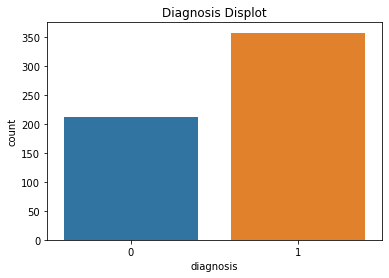

1    357
0    212
Name: diagnosis, dtype: int64

In [47]:
#distributaion of target variable
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Displot')
plt.show()
df['diagnosis'].value_counts()

0 is for Negative prediction and 1 for Positive prediction.
We can see that the problem is binary classification task

<AxesSubplot:>

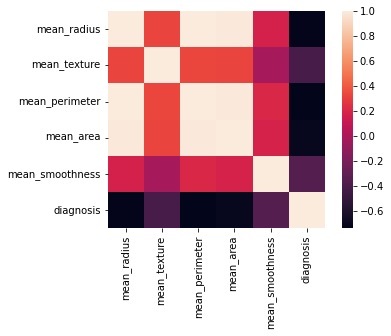

In [48]:
data = df[['mean_radius','mean_texture','mean_perimeter','mean_area', 'mean_smoothness','diagnosis']] #Subsetting the data
cor = data.corr() 
sns.heatmap(cor, square = True)

In [49]:
#spliting dataset
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [50]:
#standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [51]:
#using various classification method
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
def score(model, title = "Default"):
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
#print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 6)
    print('Accuracy for', title, ':', accuracy, '\n')

In [53]:
lg = LogisticRegression()
score(lg, "Logistic Regression")
svm=SVC()
score(svm,'SVC')
nb=GaussianNB()
score(nb, "GaussianNB")
knn=KNeighborsClassifier()
score(knn, "KNeighborsClassifier")
dt=DecisionTreeClassifier()
score(dt,"DecisionTreeClassifier")
rf = RandomForestClassifier()
score(rf, 'RandomForestClassifier')

Accuracy for Logistic Regression : 0.920213 

Accuracy for SVC : 0.930851 

Accuracy for GaussianNB : 0.909574 

Accuracy for KNeighborsClassifier : 0.925532 

Accuracy for DecisionTreeClassifier : 0.882979 

Accuracy for RandomForestClassifier : 0.920213 



As we can see that KNeighborsClassifier model gives us the maximum accuracy

In [54]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_pred=knn.predict(X_test_scaled)
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print(matrix)

[[111  10]
 [  4  63]]


In [55]:
#ROC - AUC
pred_prob1 = knn.predict_proba(X_test_scaled)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.9650302207968422


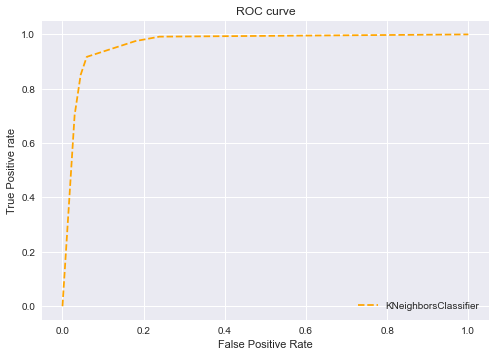

In [56]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNeighborsClassifier')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
